# ACP et aide √† l‚Äôinterpr√©tation
## 1. Importation des donn√©es actives

Dans un premier temps, nous importons le tableau des individus et variables actifs X (xij ; i =
1,‚Ä¶,n, nombre d‚Äôobservations ; j = 1,‚Ä¶,p, nombre de variables) pour la construction des axes
factoriels

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
X = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=0,header=0,index_col=0)

In [12]:
#dimension
print(X.shape) # (18, 6)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage des donn√©es
print(X)

(18, 6)
                  CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9295       1769     83   440   165   1095    165
Op

## 2. Pr√©paration des donn√©es
Nous devons explicitement centrer et r√©duire les variables pour r√©aliser une ACP norm√©e avec PCA.
Nous utilisons la classe StandardScaler pour ce faire. 

In [13]:
#instanciation
sc = StandardScaler()

#transformation ‚Äì centrage-r√©duction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [14]:
#moyenne
print(np.mean(Z,axis=0))

#√©cart-type
print(np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]
[1. 1. 1. 1. 1. 1.]


## 3. Analyse en composantes principales avec PCA de scikit-learn

In [15]:
#instanciation
acp = PCA(svd_solver='full')

In [16]:
#affichage des param√®tres
print(acp)

PCA(svd_solver='full')


Le param√®tre (svd_solver = ‚Äòfull‚Äô) indique l‚Äôalgorithme utilis√© pour la d√©composition en
valeurs singuli√®res. 

Nous choisissons la m√©thode ‚Äò‚Äôexacte‚Äô‚Äô, s√©lectionn√©e de toute mani√®re par
d√©faut pour l‚Äôappr√©hension des bases de taille r√©duite. 

D‚Äôautres approches sont disponibles pour le traitement des grands ensembles de donn√©es. 

Le nombre de composantes (K) n‚Äô√©tant pas sp√©cifi√© (n_components = None), il est par d√©faut √©gal au nombre de variables (K = p)

In [17]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calcul√©es
print(acp.n_components_) # 6

6


In [18]:
#variance expliqu√©e
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [19]:
#proportion de variance expliqu√©e
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


La premi√®re composante accapare 73.68% de l‚Äôinformation disponible. Il y a un fort 'effet
taille‚Äô dans nos donn√©es. Nous disposons de 87.94% avec les deux premiers
facteurs. Les suivants semblent anecdotiques.

Nous disposons des √©l√©ments permettant de construire le graphique 'Scree plot' (√©boulis des
valeurs propres).

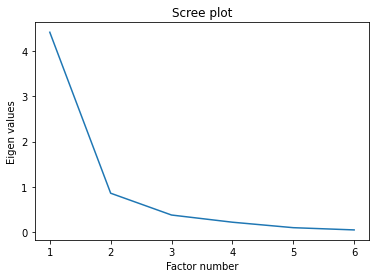

In [20]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Le graphique du cumul de variance restitu√©e selon le nombre de facteurs peut √™tre
int√©ressant √©galement.

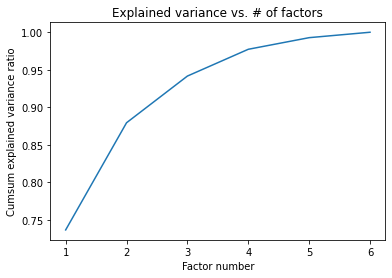

In [21]:
#cumul de variance expliqu√©e
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## 4. D√©termination du nombre de facteur √† retenir

Les 'cassures' dans les graphiques ci-dessus sont souvent √©voqu√©es (r√®gle du coude) pour identifier le nombre de facteurs K* √† retenir. 

La solution (K* = 2) semble s‚Äôimposer ici.

D‚Äôautres pistes existent pour r√©pondre √† cette question toujours d√©licate qui conditionne
l‚Äôinterpr√©tation de l‚ÄôACP, notamment le ¬´ test des b√¢tons bris√©s ¬ª.

In [22]:
#seuils pour test des b√¢tons bris√©s
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

Puis affichons conjointement les valeurs propres et les seuils :


In [23]:
#test des b√¢tons bris√©s
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


Avec cette proc√©dure, seul le premier facteur est valide. 

Le cercle des corr√©lations que nous construirons par la suite semble aller dans le m√™me sens.

N√©anmoins, nous choisissons K* = 2 pour pouvoir repr√©senter les individus et les variables dans le plan.

## 5. Repr√©sentation des individus ‚Äì Outils pour l‚Äôinterpr√©tation

### 5.1 Coordonn√©es factorielles. 

Les coordonn√©es factorielles des individus ont √©t√© collect√©es dans la variable coord. 

Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximit√©s entre les v√©hicules

NB : Les outils graphiques calculent souvent automatiquement les √©chelles en fonction des
plages de valeurs. 

Ce n‚Äôest pas une bonne id√©e en ce qui concerne l‚ÄôACP. 

En effet, les axes n‚Äôont pas la m√™me importance (% de variance restitu√©e). 

Pour ne pas fausser la perception des proximit√©s, il est tr√®s important de veiller √† ce que les √©chelles soient
identiques en abscisse et en ordonn√©e. 

Respecter cette r√®gle nous dispense de faire afficher les pourcentages de variance port√©s par les axes. 

Nous nous rendons compte directement dans notre graphique que les dispersions des individus sont nettement plus
marqu√©es sur le premier axe, en abscisse.

In [24]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #m√™me limites en abscisse
axes.set_ylim(-6,6) #et en ordonn√©e
#placement des √©tiquettes des observations
for i in range(n):
 plt.annotate(X_base["Modele"][i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

KeyError: 'Modele'

## 5.2 Qualit√© de repr√©sentation ‚Äì Les COS¬≤ (cosinus carr√©). 

Pour calculer la qualit√© de repr√©sentation des individus sur les axes, nous devons d‚Äôabord calculer les carr√©s des
distances √† l‚Äôorigine des individus, qui correspondent √©galement √† leur contribution dans l‚Äôinertie totale.

In [204]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X_base["Modele"],'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.897875
1          Audi 100   6.655601
2        Simca 1300   2.960298
3   Citroen GS Club   7.814084
4          Fiat 132   1.614657
5       Lancia Beta   1.113664
6       Peugeot 504   1.860497
7     Renault 16 TL   8.936236
8        Renault 30  20.145396
9    Toyota Corolla  14.459043
10     Alfetta-1.66   4.982030
11    Princess-1800   2.149780
12      Datsun-200L  11.432288
13      Taunus-2000   2.896666
14           Rancho   0.683103
15       Mazda-9295   0.359925
16      Opel-Rekord   5.358475
17        Lada-1300   5.680383


Concr√®tement, la Renault 30 et la Toyota Corolla sont les deux v√©hicules qui se d√©marquent
le plus des autres, et on les retrouve aux deux extr√©mit√©s du premier axe factoriel qui porte
73.68% de l‚Äôinformation disponible 

In [205]:
#qualit√© de repr√©sentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X_base["Modele"],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.493568  0.455511
1          Audi 100  0.360167  0.281680
2        Simca 1300  0.538971  0.343602
3   Citroen GS Club  0.975297  0.018098
4          Fiat 132  0.153129  0.578910
5       Lancia Beta  0.118624  0.030487
6       Peugeot 504  0.207894  0.720126
7     Renault 16 TL  0.512628  0.348459
8        Renault 30  0.888384  0.026584
9    Toyota Corolla  0.963119  0.021257
10     Alfetta-1.66  0.034418  0.888320
11    Princess-1800  0.386059  0.547131
12      Datsun-200L  0.860836  0.002373
13      Taunus-2000  0.644980  0.159623
14           Rancho  0.220440  0.236814
15       Mazda-9295  0.093650  0.002278
16      Opel-Rekord  0.862532  0.000067
17        Lada-1300  0.945436  0.039114


Conform√©ment √† la th√©orie, pour chaque individu, la somme des COS¬≤ sur l‚Äôensemble des
facteurs est √©gale √† 1.

In [206]:
#v√©rifions la th√©orie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 5.3 Contribution des individus aux axes (CTR).

Elles permettent de d√©terminer les individus qui p√®sent le plus dans la d√©finition de chaque facteur

In [207]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X_base["Modele"],'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057738  0.204410
1          Audi 100  0.031515  0.094550
2        Simca 1300  0.020976  0.051299
3   Citroen GS Club  0.100194  0.007132
4          Fiat 132  0.003251  0.047142
5       Lancia Beta  0.001737  0.001712
6       Peugeot 504  0.005085  0.067570
7     Renault 16 TL  0.060226  0.157045
8        Renault 30  0.235290  0.027009
9    Toyota Corolla  0.183083  0.015501
10     Alfetta-1.66  0.002254  0.223199
11    Princess-1800  0.010911  0.059320
12      Datsun-200L  0.129384  0.001368
13      Taunus-2000  0.024563  0.023319
14           Rancho  0.001980  0.008158
15       Mazda-9295  0.000443  0.000041
16      Opel-Rekord  0.060764  0.000018
17        Lada-1300  0.070605  0.011206


Sans surprises, ce sont la Renault 30 et la Toyota Corolla qui sont d√©terminants pour le
premier axe ; 

pour le second, nous avons l‚ÄôAlfetta-1.66, l‚ÄôAlfasud TI et l‚ÄôAudi 100.

Les sommes en ligne sont √©gales √† l‚Äôunit√© ici :

In [208]:
#v√©rifions la th√©orie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


## 6. Repr√©sentation des variables ‚Äì Outils pour l‚Äôaide √† l‚Äôinterpr√©tation

Nous avons besoin des vecteurs propres pour l‚Äôanalyse des variables. Ils sont fournis par le
champ .components_.

In [209]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.43144898  0.4382007   0.42961187  0.39035852  0.44335893 -0.29718453]
 [ 0.03103726  0.39390974 -0.35483203 -0.39737155 -0.20775137 -0.71895845]
 [-0.54635753 -0.08327605  0.17193835  0.6181932  -0.3595677  -0.39184689]
 [-0.68264415  0.19179511  0.31955703 -0.38556977  0.49626326 -0.01239491]
 [-0.18542919  0.13433178 -0.74686559  0.3913198   0.47995277  0.07922713]
 [-0.11830001  0.76879774  0.00633745  0.07588153 -0.39287583  0.48456738]]


Attention, les facteurs sont en ligne, les variables en colonne. 

Nous devons en tenir compte pour obtenir les corr√©lations (variables x facteurs, ùëüùëóùëò) en les multipliant par la racine carr√©e des valeurs propres :

In [210]:
#racine carr√©e des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corr√©lation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corr√©lations variables x facteurs
print(corvar)

[[ 8.86909244e-01  3.25753309e-02 -3.25893432e-01 -3.20963528e-01
  -5.45585483e-02 -1.14057203e-02]
 [ 9.00788426e-01  4.13430173e-01 -4.96728152e-02  9.01776354e-02
   3.95242343e-02  7.41224980e-02]
 [ 8.83132785e-01 -3.72415940e-01  1.02558445e-01  1.50248343e-01
  -2.19749130e-01  6.11016062e-04]
 [ 8.02441518e-01 -4.17063538e-01  3.68742250e-01 -1.81286009e-01
   1.15137430e-01  7.31600576e-03]
 [ 9.11391958e-01 -2.18046611e-01 -2.14476318e-01  2.33331532e-01
   1.41215774e-01 -3.78785427e-02]
 [-6.10908165e-01 -7.54586863e-01 -2.33730334e-01 -5.82779991e-03
   2.33108778e-02  4.67188475e-02]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l‚Äôon s‚Äôen tient sp√©cifiquement aux deux premiers facteurs :

In [211]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

            id     COR_1     COR_2
0          CYL  0.886909  0.032575
1        PUISS  0.900788  0.413430
2         LONG  0.883133 -0.372416
3         LARG  0.802442 -0.417064
4        POIDS  0.911392 -0.218047
5  R-POID.PUIS -0.610908 -0.754587


Nous pouvons dessiner maintenant le cercle des corr√©lations

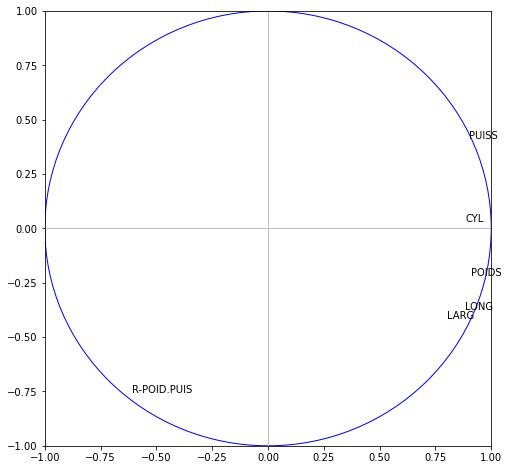

In [212]:
#cercle des corr√©lations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des √©tiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On per√ßoit clairement l‚Äôeffet taille sur le premier axe :

les voitures puissantes et rapides sont
aussi les plus lourdes et imposantes, la relation globale entre les variables est en r√©alit√©
d√©termin√©e par la cylindr√©e (CYL)

## 6.1 Qualit√© de repr√©sentation des variables (COS¬≤). 

On peut calculer la qualit√© de
repr√©sentation des variables en montant la corr√©lation au carr√©.

In [213]:
#cosinus carr√© des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

            id    COS2_1    COS2_2
0          CYL  0.786608  0.001061
1        PUISS  0.811420  0.170925
2         LONG  0.779924  0.138694
3         LARG  0.643912  0.173942
4        POIDS  0.830635  0.047544
5  R-POID.PUIS  0.373209  0.569401


Contribution des variables aux axes (CTR). La contribution est √©galement bas√©e sur le
carr√© de la corr√©lation, mais relativis√©e par l‚Äôimportance de l‚Äôaxe

In [215]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

            id     CTR_1     CTR_2
0          CYL  0.044051  0.000874
1        PUISS  0.045441  0.140858
2         LONG  0.043677  0.114297
3         LARG  0.036060  0.143345
4        POIDS  0.046517  0.039181
5  R-POID.PUIS  0.020900  0.469242


In [5]:
X2 = pd.read_excel("autos_acp_pour_python.xlsx",sheet_name=1,header=0,index_col=0)

NameError: name 'pandas' is not defined